In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

c:\Users\sugim\anaconda3\envs\Ryo\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\sugim\anaconda3\envs\Ryo\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\sugim\anaconda3\envs\Ryo\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
c:\Users\sugim\anaconda3\envs\Ryo\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Read files to dictionary
data_path = "highd-dataset/data/"
n_files = 60
data_dict = {}
location_id = []
for i in range(n_files):
    print(f"reading file {i+1}/{n_files}...\r", end="")
    file_name1 = f"{i+1:02d}_tracks.csv"
    file_path1 = os.path.join(data_path, file_name1)
    file_name2 = f"{i+1:02d}_recordingMeta.csv"
    file_path2 = os.path.join(data_path, file_name2)
    data_dict[f"data_{i+1}"] = pd.read_csv(file_path1)
    location_id.append(pd.read_csv(file_path2)["locationId"][0])

In [3]:
lane_vel = {}
lane_mean = {}
lane_std = {}
loc_vel = {}
loc_mean = {}
loc_std = {}
count = 1

# Gather data based on lane
def lane_sep(lanes, vel, count):
    for i in range(len(lanes)):
        lane = lanes[i]
        try:
            lane_vel[f"lane_{lane}"].extend([vel[i]])
        except:
            lane_vel[f"lane_{lane}"] = ([vel[i]])
    if count == n_files:
        for j in lane_vel.keys():
            lane_mean[j]=np.mean(lane_vel[j])
            lane_std[j]=np.std(lane_vel[j])
    return lane_vel, lane_mean, lane_std

# Gather data based on location
def loc_sep(loc, vel, count):
    try:
        loc_vel[f"loc_{loc}"].extend(vel)
    except:
        loc_vel[f"loc_{loc}"] = vel
    if count == n_files:
        for j in loc_vel.keys():
            loc_mean[j]=np.mean(loc_vel[j])
            loc_std[j]=np.std(loc_vel[j])
    count += 1

In [4]:
file_mean = {}
file_std = {}
vel = {}
total_vel = []

# Calculation of speed distribution
for i in range(n_files):
    x_vel = data_dict[f"data_{i+1}"]["xVelocity"]
    y_vel = data_dict[f"data_{i+1}"]["yVelocity"]
    lanes = data_dict[f"data_{i+1}"]["laneId"]
    vel[f"data_{i+1}"] = np.sqrt(x_vel**2 + y_vel**2)
    total_vel.append(np.sqrt(x_vel**2 + y_vel**2))
    lane_sep(lanes, vel[f"data_{i+1}"], i+1)
    loc_sep(location_id[i], vel[f"data_{i+1}"], i+1)
    file_mean[f"data_{i+1}"] = np.mean(vel[f"data_{i+1}"])
    file_std[f"data_{i+1}"] = np.std(vel[f"data_{i+1}"])
    lane_id = data_dict[f"data_{i+1}"]["laneId"]

In [5]:
# Calculate the overall mean/std
velocity_mean = np.mean(np.concatenate(total_vel, axis=0))
velocity_std = np.std(np.concatenate(total_vel, axis=0))

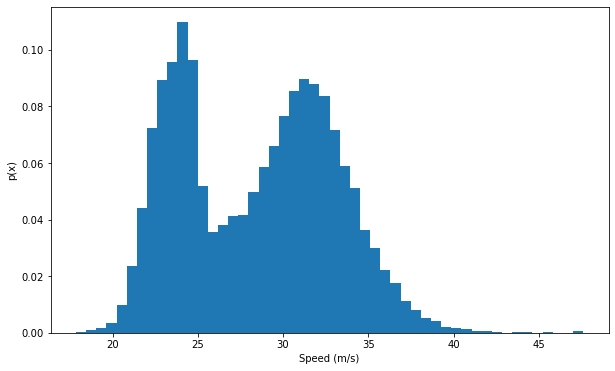

In [16]:
# Visualize by data number
data_keys = sorted(list(key for key in vel.keys()))
data_num = input(f"Which data to visualize:{data_keys}")

plt.figure(figsize=(10,6))
plt.xlabel("Speed (m/s)")
plt.ylabel("p(x)")
plt.hist(vel[f"data_{data_num}"], bins=50, density=True);

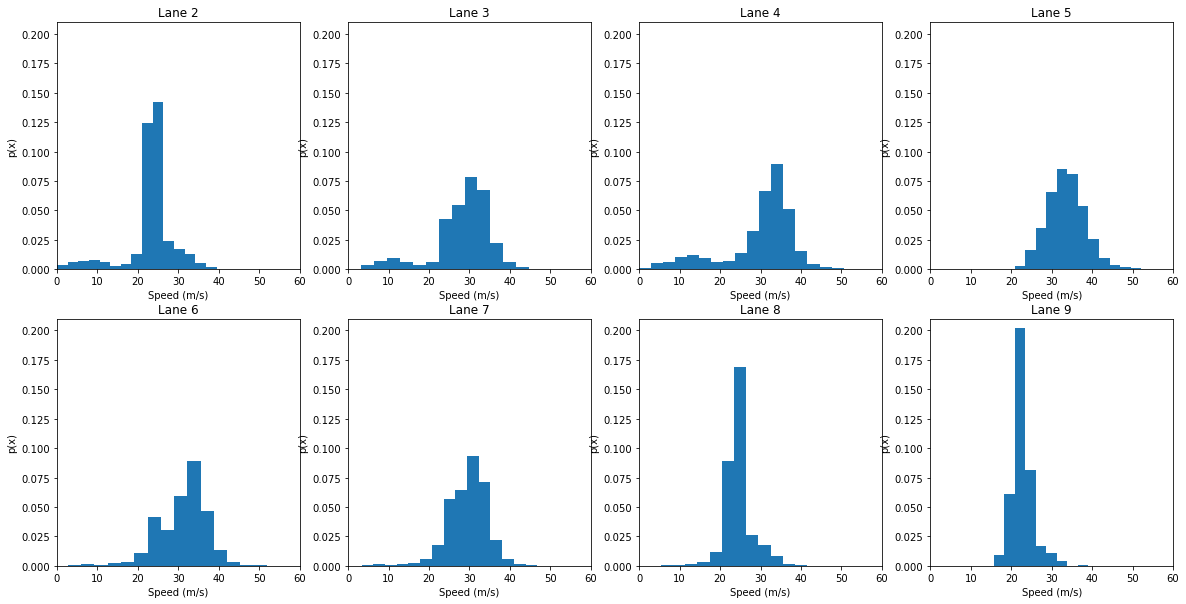

In [7]:
# Visualize by lanes
lane_keys = sorted(list(key for key in lane_vel.keys()))

idx=0
fig, axs = plt.subplots(2, 4)
fig.set_figheight(10)
fig.set_figwidth(20)
plt.setp(axs, xlim=(0, 60), ylim=(0, 0.21))
for i in range(2):
    for j in range(4):
        axs[i, j].hist(lane_vel[lane_keys[idx]], bins=20, density=True)
        axs[i, j].set_title(f"Lane {idx+2}")
        idx += 1

for ax in axs.flat:
    ax.set(xlabel="Speed (m/s)", ylabel="p(x)")

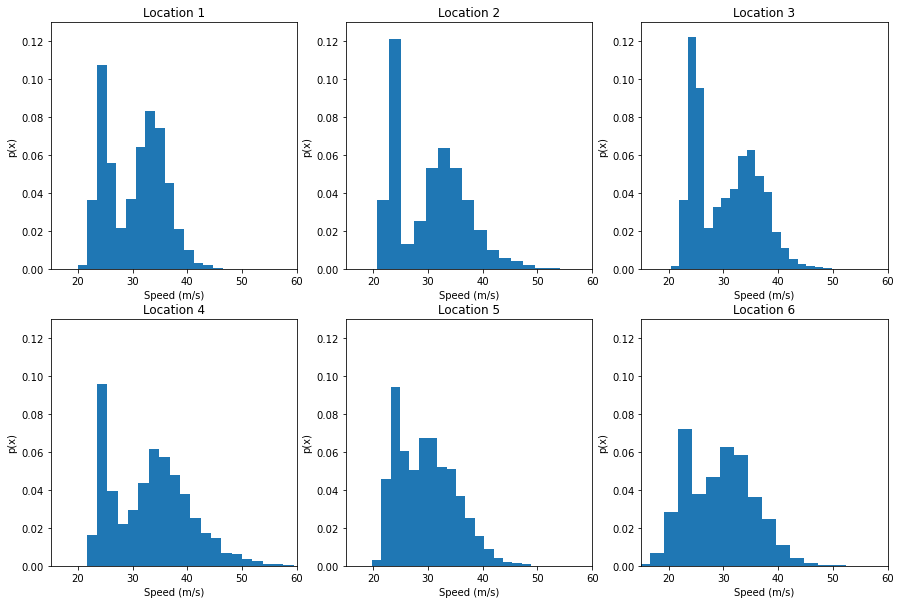

In [8]:
# Visualize by location
loc_keys = sorted(list(key for key in loc_vel.keys()))

idx=0
fig, axs = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.setp(axs, xlim=(15, 60), ylim=(0, 0.13))
for i in range(2):
    for j in range(3):
        axs[i, j].hist(loc_vel[loc_keys[idx]], bins=20, density=True)
        axs[i, j].set_title(f"Location {idx+1}")
        idx += 1

for ax in axs.flat:
    ax.set(xlabel="Speed (m/s)", ylabel="p(x)")

In [9]:
# Return calculated mean/std
print("------Whole Dataset------")
print(f"Mean: {velocity_mean}, Standard Deviation: {velocity_std}\n")
print("------Lane Split------")
print(f"Mean: {lane_mean}\nStandard Deviation: {lane_std}\n")
print("------Location Split------")
print(f"Mean: {loc_mean}\nStandard Deviation: {loc_std}")

------Whole Dataset------
Mean: 28.08493295853788, Standard Deviation: 6.936464188526539

------Lane Split------
Mean: {'lane_5': 33.61362780946028, 'lane_2': 23.23149047045839, 'lane_3': 28.287845262639234, 'lane_6': 31.148474755986253, 'lane_8': 24.54246815080985, 'lane_7': 29.575175594493267, 'lane_4': 29.978641975987458, 'lane_9': 22.71569571894878}
Standard Deviation: {'lane_5': 4.722057904252365, 'lane_2': 5.925109055024181, 'lane_3': 7.229322798024107, 'lane_6': 5.954893850417426, 'lane_8': 3.4239445411302936, 'lane_7': 4.803808676269681, 'lane_4': 8.758875149256117, 'lane_9': 2.620838042339557}

------Location Split------
Mean: {'loc_2': 30.432862134155467, 'loc_3': 30.408382297209666, 'loc_4': 33.25530876727649, 'loc_1': 30.402433918283997, 'loc_5': 29.668183778907057, 'loc_6': 29.366139351633645}
Standard Deviation: {'loc_2': 6.385091258611131, 'loc_3': 5.734271977842443, 'loc_4': 7.079568200316081, 'loc_1': 5.154157653217512, 'loc_5': 5.214035962016041, 'loc_6': 6.0293733473

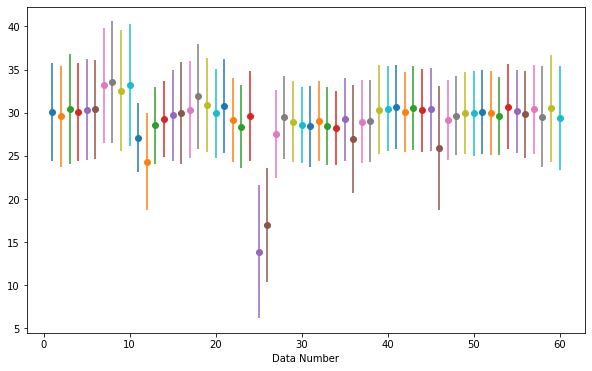

In [21]:
plt.figure(figsize=(10, 6))
plt.xlabel("Data Number")
for i in range(len(vel)):
    plt.errorbar(i+1, file_mean[f"data_{i+1}"], file_std[f"data_{i+1}"], linestyle="None", marker="o")
plt.show()

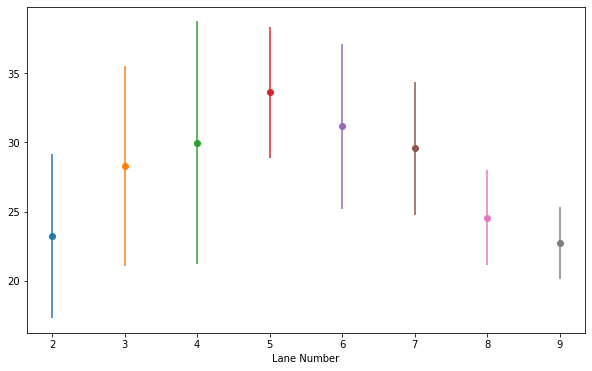

In [22]:
plt.figure(figsize=(10, 6))
plt.xlabel("Lane Number")
for i in range(len(lane_vel)):
    plt.errorbar(i+2, lane_mean[f"lane_{i+2}"], lane_std[f"lane_{i+2}"], linestyle="None", marker="o")
plt.show()

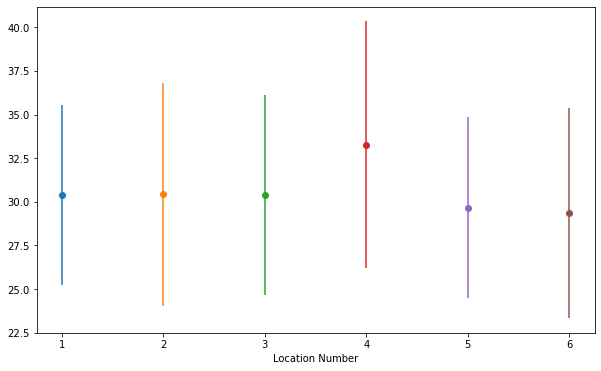

In [23]:
plt.figure(figsize=(10, 6))
plt.xlabel("Location Number")
for i in range(len(loc_vel)):
    plt.errorbar(i+1, loc_mean[f"loc_{i+1}"], loc_std[f"loc_{i+1}"], linestyle="None", marker="o")
plt.show()